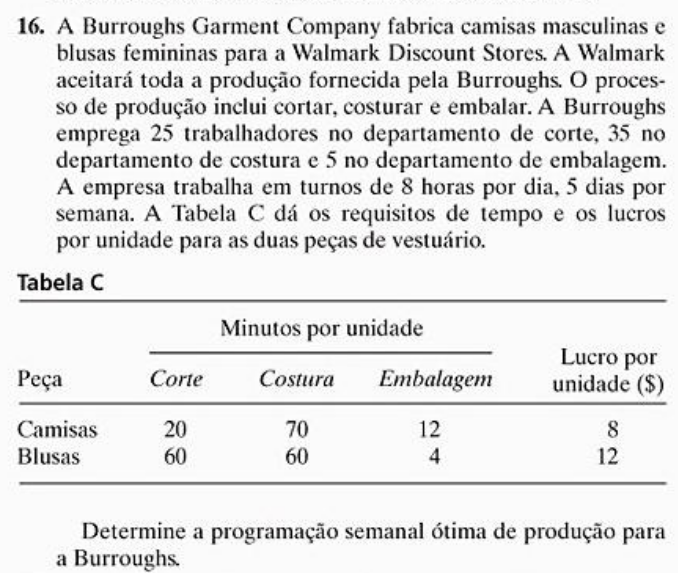

In [1]:
%pip install cplex
%pip install docplex

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from docplex.mp.model import Model

# Criação do modelo com um nome descritivo
model = Model('Producao_Semanal_Burroughs')

In [3]:
# --- Parâmetros extraídos do enunciado e da Tabela C ---

# Nomes das peças e departamentos para referência
pecas = ['camisa', 'blusa']
departamentos = ['corte', 'costura', 'embalagem']

# Dados financeiros
lucro_por_unidade = {'camisa': 8, 'blusa': 12}

# Dados de produção (minutos por unidade)
minutos_por_peca = {
    'camisa': {'corte': 20, 'costura': 70, 'embalagem': 12},
    'blusa':  {'corte': 60, 'costura': 60, 'embalagem': 4}
}

# Cálculo da capacidade de mão-de-obra por semana
num_trabalhadores = {'corte': 25, 'costura': 35, 'embalagem': 5}
minutos_por_semana_por_trabalhador = 8 * 60 * 5 # 8h/dia * 60min/h * 5dias/sem = 2400 min/semana

# Capacidade total em minutos por departamento por semana
minutos_totais_disponiveis = {
    d: num_trabalhadores[d] * minutos_por_semana_por_trabalhador for d in departamentos
}
# Corte: 25 * 2400 = 60000 min
# Costura: 35 * 2400 = 84000 min
# Embalagem: 5 * 2400 = 12000 min

In [4]:
# 1. Variáveis de Decisão
# Número de peças de cada tipo a serem produzidas por semana
num_pecas = model.integer_var_dict(pecas, name='Peca')
# A produção de peças deve ser em números inteiros.

# 2. Função Objetivo
# Maximizar o lucro semanal total
expressao_lucro = (lucro_por_unidade[p] * num_pecas[p] for p in pecas)
soma_lucro_total = model.sum(expressao_lucro)
model.maximize(soma_lucro_total)


# 3. Restrições

# Restrições de tempo para cada departamento
for d in departamentos:
    expressao_tempo_usado = (minutos_por_peca[p][d] * num_pecas[p] for p in pecas)
    soma_tempo_usado = model.sum(expressao_tempo_usado)
    restr_tempo_logica = soma_tempo_usado <= minutos_totais_disponiveis[d]
    model.add_constraint(restr_tempo_logica, ctname=f'limite_tempo_{d}')

In [5]:
# Define um tempo limite para o solver (opcional)
model.parameters.timelimit = 120

# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA ------\n')
print(solucao)

--- Resolvendo o modelo ---
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               120
Found incumbent of value 0.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve modified 3 coefficients.
Reduced MIP has 3 rows, 2 columns, and 6 nonzeros.
Reduced MIP has 0 binaries, 2 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
Reduced MIP has 3 rows, 2 columns, and 6 nonzeros.
Reduced MIP has 0 binaries, 2 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.00 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 0.00 sec. (0.00 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0   

Considerando 8 horas por dia e 5 dias por semana, temos 40 hrs/semana. Assim, a objetivo seria 340/hrs, 12 camisas/hrs e 21 blusas/hrs.